# Muesli Project - Diagnostic Analysis 

#### **WHY DIAGNOSTIC ANALYSIS?**

Previously we looked into what is happening, using our magnifying glass on the data to perform descriptive analysis.

Now we will go one step further to explain what is happening i.e **WHY Is it Happening**

This entails that we go even deeper and explore further the key points of interest with the aim to exlpain why this takes place vs what is assumed.

---
## **How to use the notebook**

This is a guided notebook with instances where you will also code to practice what you just covered.
There are 3 cases of code blocks that you will come across 

- Case 1: **complete working code**

    - You will come across code blocks that are complete to give you an idea what is being done.

- Case 2: **fill in the blanks** :

    -  The comments in the code blocks will have hints to help you. 

    -  If you are completely stuck there is toggle markdown **`Spoiler`** that you can use

- Case 3: **completely empty** 
    -  When a step has been repeated multiple times you will find a codeblock that is with only the comment there to guide you 
    - If you are completely stuck there is toggle markdown **`Answer`** that you can use

Lastly there are scenarios where you have to write down your thoughts, interpretation into a Markdown cell, simply double click on the cell that says:

`Your Answer here:`

---
## Import Packages

In [3]:
# Package for processing data
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
import numpy as np

# Packages for plotting & visualization purposes
import matplotlib.pyplot as plt
import seaborn as sns

# import datetime to allow us to add days to a datetype entry
from datetime import datetime


## Load the data processed in the previous Notebook

In the first notebook you prepped the data i.e. cleaning and transforming the data. 

Use this **"cleaned data"** to perform further exploratory data analysis on the muesli data to identify whether the Warehouse manager's assumptions hold true or not with a data-driven approach.

The focus will be on the 4 warehouse KPIs defined and saved from the Descriptive section of the project.

In [2]:
# read the four cleaned csv files 
orders = pd.read_csv('./data/orders_cleaned.csv') # first row of this csv file is empty
order_process = pd.read_csv('./data/order_process_cleaned.csv')
intern_study = pd.read_csv('./data/intern_study_cleaned.csv')
campaign = pd.read_csv('./data/campaign_cleaned.csv')

# read in order_cycle dataframe from last session
order_cycle = pd.read_csv('./data/order_cylce_kpi.csv')
lead_time = pd.read_csv('./data/lead_time_kpi.csv')
shipping = pd.read_csv('./data/shipping_kpi.csv')
pickup_time = pd.read_csv("./data/pickup_time_kpi.csv")

FileNotFoundError: [Errno 2] No such file or directory: './data/order_cylce_kpi.csv'

# Summary Last Practice Session

- **We gained a general understanding of the business of the muesli company**

#### Investigated our 4 main KPIs

- KPI1: 3002 dp, avg 4.17

- KPI2: 204 dp, avg 1.5

- KPI3: 333 dp, avg 4.6

- KPI4 (total): 333 dp, avg 10.9

Main insight is that this is very different to the numbers the management team gave us...

- First task is done, so these are the KPIs we need to track the health of the delivery process.

- Now we will help the business to understand why these delivery times are actually longer than planned.

### ...let's understand the 'WHY'

why is the delivery process delayed?

![KPI overview](images/kpi.png)

in order to understand the overall delay for the order lead time, we can study each KPI that represents one step in the delivery process by itself.
We start with KPI 1 - the order cycle time.

## Investigation of delay in order cycle time

Let's recap, 
- how would the order cycle time look like according to the warehouse?
- how would the order cycle time look like in an ideal world? 
- What are the most relevant factors affecting the delivery process? 
- What are our assumptions we want to test?


![Order Cycle Time With Weekend](images/order_cycle_time_weekend.png)

#### Observations
- We see that the weekend has a big effect on the effective order cycle time from the customers perspective. 
- However, as the warehouse only works Mondays to Fridays, the factor of the delays by the weekend should be taken out when studying root-causes for the delay from the companies point of view. In an ideal world the order cycle time should be always 2. 
- the ship mode has no impact on the order cycle time. We can confirm this later with out data.
- the day of order has an impact on the order cycle time if we include the weekend. 

#### next steps
- draw process without weekend.
- investigate impact of ship mode and confirm our assumption with data.
- investigate relationship with weekday of order and confirm our assumption with data.

![Order Cycle Time No Weekend](images/order_cycle_time_no_weekend.png)

#### Observations
- the ship mode has no impact on the order cycle time. We can confirm this later with out data.
- the day of order has no impact on the order cycle time if we exclude the weekend. 
- the order cycle time is always 2. We have seen already that the data-driven reality is 2.8.

#### next
- investigate impact of ship mode and confirm our assumption with data.
- investigate relationship with weekday of order and confirm our assumption with data.

In [ ]:
# step to calculate metrics without weekend 
# this here is called a lambda function: 
# lambda row: np.busday_count(row['order_date'].date(), row['ready_to_ship_date'].date())
# it enables us to apply the busday_count function to each row of our dataframe.

# order cycle time
order_cycle['order_date'] = pd.to_datetime(order_cycle["order_date"])
order_cycle['ready_to_ship_date'] = pd.to_datetime(order_cycle["ready_to_ship_date"])

order_cycle['order_to_ready_int_no_weekend'] = order_cycle.apply(lambda row: np.busday_count(
                                                                        row['order_date'].date(), 
                                                                        row['ready_to_ship_date'].date()),axis=1)

In [ ]:
# Let's compare the weekend effect on the average order cycle time
order_cycle[['order_to_ready_int_no_weekend','order_to_ready_int']].mean()

order_to_ready_int_no_weekend    2.769608
order_to_ready_int               4.176471
dtype: float64

Even with only counting business days the `average order cycle time` is more than the expected `2 days`.

As a first step it's a good idea to look at the average metric in more detail and plot it's distribution.

---
# Step 1 - Study Distributions

## KPI 1 - Order Cycle Time KPI

In [ ]:
# let's calculate the average order cycle time again
order_cycle["order_to_ready_int_no_weekend"].mean()

2.769607843137255

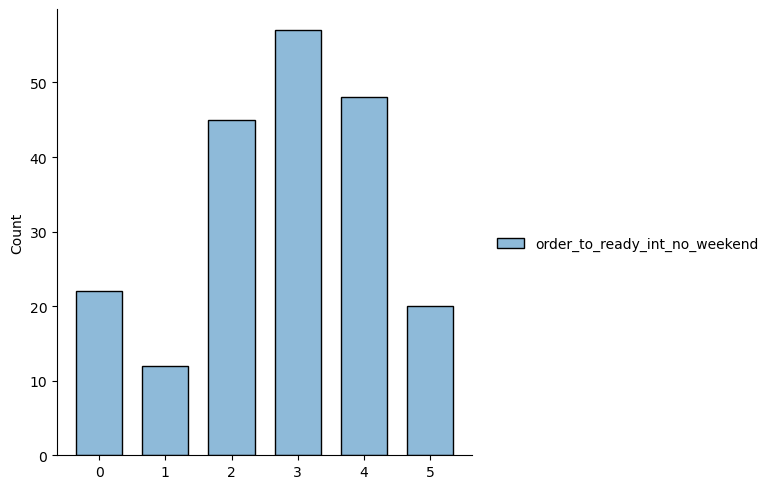

In [ ]:
# now, let's look at the distribution of the order cycle time KPI
# we do this via seaborn's displot function...
sns.displot(order_cycle[['order_id','order_to_ready_int_no_weekend']],discrete=True,shrink=.7)

In [ ]:
print("Number of order with 0 days for order cycle time: "+str(order_cycle[order_cycle.order_to_ready_int_no_weekend==0]['order_id'].count()))

Number of order with 0 days for order cycle time: 22


In [ ]:
print("Number of order with 4 or more days for order cycle time: "+str(order_cycle[order_cycle.order_to_ready_int_no_weekend>=4]['order_id'].count()))

Number of order with 4 or more days for order cycle time: 68


<Axes: >

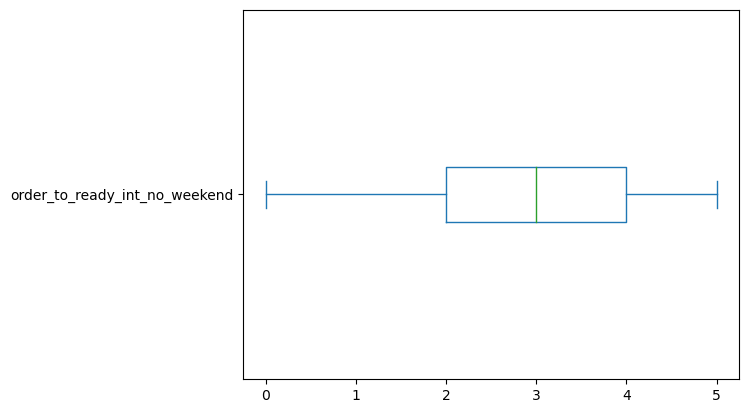

In [ ]:
# or in the same way we can look at it with a boxplot...

order_cycle.order_to_ready_int_no_weekend.plot(kind="box", vert=False)

### **Observations**
- in the boxplot we see that the median is 3. The median and the average is 2.76 higher than the warehouse assumption of 2 days.

- there are 22 outliers that have 0 as a order cycle time, meaning the same day they got ordered they were made already 'ready to ship'....this seems a bit odd so let's look into them later in more detail.

- there are 68 outliers that have high order cycle times with 4 or more days. Also these ones we should investigate later in more detail.

    **-->  After analyzing the distribution of our KPI we have a better understanding of our average metric and some next steps what to analyse further.**

---
#### Derived next steps
- why do some orders have an order cycle time of 0 days?

- why do some orders have an order cycle time of 4 or more days?

---
## Step 2 - Data Segmentation

--> Let's try to prove our assumption that the ship mode has no affect on the order cycle time.

## Order cycle time KPI per ship mode

Quick reminder for everyone what the ship modes are about: Customers can pay for Express processing that means the orders leave on the truck the day the order is ready for shipping.


In [ ]:
# let's look the ship mode column
order_cycle.columns

Index(['order_id', 'order_date', 'origin_channel', 'region', 'category',
       'sub_category', 'ready_to_ship_date', 'pickup_date',
       'expected_ready_to_ship_date', 'order_year', 'order_to_ready',
       'order_to_ready_no_weekend', 'order_to_ready_int', 'order_weekday',
       'ready_weekday', 'order_weekday_int', 'order_to_ready_int_no_weekend'],
      dtype='object')

In [ ]:
# we see, it's not there, which dataset contains the ship mode and can we join it?
order_process.columns

Index(['order_id', 'order_date', 'on_truck_scan_date', 'ship_mode'], dtype='object')

In [ ]:
# remember that order_process had multiple columns per order_id
print(order_process['order_id'].count())
print(order_process['order_id'].nunique())

3003
3002


In [ ]:
# double check that order_process has only one shipmode per order_id
# this here is called a lambda function: 'lambda x: x.nunique()' it enables to cound unique order_ids

test = order_process.groupby('order_id').agg(shipmode_count_unique=('ship_mode',lambda x: x.nunique()))
print("any orders with two ship modes? " + str(test[test.shipmode_count_unique>1].count()))

any orders with two ship modes? shipmode_count_unique    0
dtype: int64


In [ ]:
# create unique lookup for ship mode
shipmode_lookup = order_process[['order_id','ship_mode']].drop_duplicates()

In [ ]:
# let's join order_process to get the ship mode
order_cycle_ship_mode = order_cycle.merge(shipmode_lookup, on='order_id', how='left') 

In [ ]:
# double check counts after join
print(order_cycle_ship_mode['order_id'].count())
print(order_cycle['order_id'].count())

204
204


#### Let's get average order cycle time KPIs broken down by ship mode

In [ ]:
#todo explain: lambda x: x.nunique()
order_cycle_avg_by_ship_mode = order_cycle_ship_mode.groupby('ship_mode')\
                                .agg(order_count=('order_id',lambda x: x.nunique()),
                                    avg_order_cycle_time=('order_to_ready_int_no_weekend','mean'))

# let's take a look
order_cycle_avg_by_ship_mode



,order_count,avg_order_cycle_time
ship_mode,,
Express,53,1.396226
Standard Processing,151,3.251656


In [ ]:
# let's compare this to what the manager told us about the delivery times for standard and express
# we do this by adding a new column with the warehouse assumptions for the order cycle time.
order_cycle_avg_by_ship_mode['warehouse_assumption'] = ['2','2']

In [ ]:
order_cycle_avg_by_ship_mode

,order_count,avg_order_cycle_time,warehouse_assumption
ship_mode,,,
Express,53,1.396226,2
Standard Processing,151,3.251656,2


#### **Observations**

so that's interesting, 
- we see that the average of 2.8 splits into 1.4 days for express deliveries and 3.3 days for standard processing.

- for express mode the avg. order cycle time is even faster than what the warehouse assumes.

- for standard processing the avg order cycle time is slower by 1.3 days than what the warehouse assumes.

- we tested our assumption to be wrong as the ship mode has an effect on the order cycle time.

#### Next steps
Let's explore the average in more detail with the help of distributions.

In [ ]:
# For that, create two subsets of our data - one for Express, one for standard
order_cycle_standard = order_cycle_ship_mode[order_cycle_ship_mode.ship_mode=='Standard Processing']
order_cycle_express = order_cycle_ship_mode[order_cycle_ship_mode.ship_mode=='Express']

#### Distribution for Order Cycle Time - Standard Processing

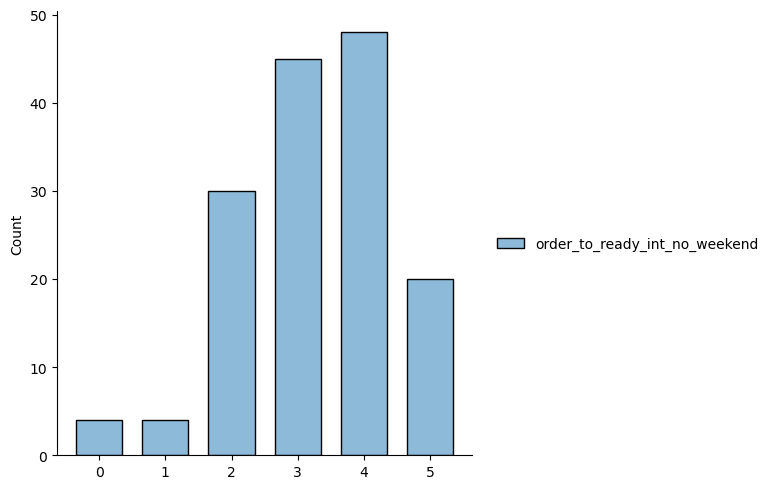

In [ ]:
sns.displot(order_cycle_standard[['order_id','order_to_ready_int_no_weekend']],discrete=True,shrink=.7)
# todo seaborn align the whole integer numbers exactly

 #### **Observations**
 
- standard processing has more outliers of 3 or more days than outliers of 1 or less days.  

#### Distribution for Order Cycle Time - Express

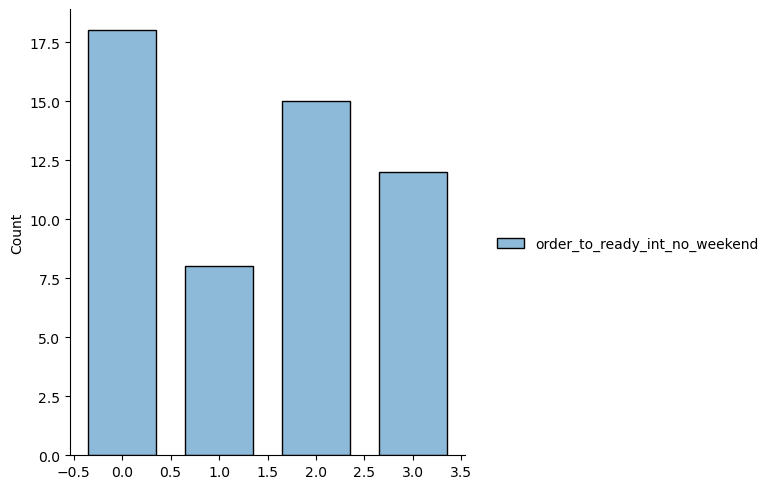

In [ ]:
sns.displot(order_cycle_express[['order_id','order_to_ready_int_no_weekend']],discrete=True,shrink=.7)

In [ ]:
print("Number of express order with 0 days for order cycle time: "+str(order_cycle_express[order_cycle_express.order_to_ready_int_no_weekend==0]['order_id'].count()))


Number of express order with 0 days for order cycle time: 18


#### **Observations**

- express processing has more outliers with 1 or 0 days than outliers towards the other side.

- express processing has no outliers with more than 3 days of order cycle time.

- 82% of outliers with 0 days happen with express processing. This seems ok, that sometimes order for express shipping are received and processed within one day. 


#### **Observation for combined view on standard versus express shipping mode**

Again, we can confirm our assumption regarding ship mode is not true. the ship mode really has an effect on the order cycle time as the two subsets of our data are differently distributed.

#### Next step 

As we study a process over time it'll be interesting to study the relationship of the processing time and the different weekdays. 

---
## Step 3 -  Discover Relationships between Variables

### Order Cycle KPI and weekday of order

In [ ]:
order_cycle_standard.columns

Index(['order_id', 'order_date', 'origin_channel', 'region', 'category',
       'sub_category', 'ready_to_ship_date', 'pickup_date',
       'expected_ready_to_ship_date', 'order_year', 'order_to_ready',
       'order_to_ready_no_weekend', 'order_to_ready_int', 'order_weekday',
       'ready_weekday', 'order_weekday_int', 'order_to_ready_int_no_weekend',
       'ship_mode'],
      dtype='object')

In [ ]:
order_cycle_time_by_weekday = order_cycle.groupby(["order_weekday","order_weekday_int"]).agg(
                                        order_count=('order_id',lambda x: x.nunique()),
                                        avg_order_cycle_time_no_weekend=('order_to_ready_int_no_weekend','mean')
                                        )
order_cycle_time_by_weekday.sort_values('order_weekday_int', inplace=True)

In [ ]:
order_cycle_time_by_weekday

,,order_count,avg_order_cycle_time_no_weekend
order_weekday,order_weekday_int,,
Monday,1,35,3.314286
Tuesday,2,48,3.145833
Wednesday,3,37,2.621622
Thursday,4,31,2.129032
Friday,5,37,2.594595
Saturday,6,13,2.000000
Sunday,7,3,4.333333


#### **Observations**
- Sunday looks weird. is the sample size maybe too low? is there maybe one mistake? Look at the distribution for Sunday.

- We see a variablity in the weekdays. technically this should be all the same.

In [ ]:
order_cycle['cycletime_1day_count'] = np.where(order_cycle['order_to_ready_int_no_weekend']==1,1,0)
order_cycle['cycletime_2day_count'] = np.where(order_cycle['order_to_ready_int_no_weekend']==2,1,0)
order_cycle['cycletime_3day_count'] = np.where(order_cycle['order_to_ready_int_no_weekend']==3,1,0)
order_cycle['cycletime_4day_count'] = np.where(order_cycle['order_to_ready_int_no_weekend']==4,1,0)
order_cycle['cycletime_5day_count'] = np.where(order_cycle['order_to_ready_int_no_weekend']==5,1,0)

In [ ]:
order_cycle_time_by_weekday = order_cycle.groupby(["order_weekday","order_weekday_int"]).agg(
                                        order_count=('order_id',lambda x: x.nunique()),
                                        cycletime_1day_count=('cycletime_1day_count','sum'),
                                        cycletime_2day_count=('cycletime_2day_count','sum'),
                                        cycletime_3day_count=('cycletime_3day_count','sum'),
                                        cycletime_4day_count=('cycletime_4day_count','sum'),
                                        cycletime_5day_count=('cycletime_5day_count','sum'),
                                        avg_cycle_time_no_weekend=('order_to_ready_int_no_weekend','mean')
                                        )
order_cycle_time_by_weekday.sort_values('order_weekday_int', inplace=True)

In [ ]:
order_cycle_time_by_weekday

,,order_count,cycletime_1day_count,cycletime_2day_count,cycletime_3day_count,cycletime_4day_count,cycletime_5day_count,avg_cycle_time_no_weekend
order_weekday,order_weekday_int,,,,,,,
Monday,1,35,0,4,8,11,8,3.314286
Tuesday,2,48,1,10,4,22,6,3.145833
Wednesday,3,37,1,4,24,4,0,2.621622
Thursday,4,31,2,19,6,2,0,2.129032
Friday,5,37,8,8,12,4,4,2.594595
Saturday,6,13,0,0,2,5,0,2.000000
Sunday,7,3,0,0,1,0,2,4.333333


There are only 3 orders that were received on a sunday. We need to collect more data for sunday orders to make some further investigations into this.

#### Next step
Let's take a deeper look into average order cycle time by weekday and split it by ship mode as well. Maybe we can narrow down the problem....

In [ ]:
# do the same by ship mode
order_cycle_time_standard_by_weekday = order_cycle_standard.groupby(["order_weekday","order_weekday_int"])[["order_to_ready_int_no_weekend"]].mean()
order_cycle_time_express_by_weekday = order_cycle_express.groupby(["order_weekday","order_weekday_int"])[["order_to_ready_int_no_weekend"]].mean()
order_cycle_time_standard_by_weekday.sort_values('order_weekday_int', inplace=True)
order_cycle_time_express_by_weekday.sort_values('order_weekday_int', inplace=True)

<Axes: xlabel='order_weekday', ylabel='avg_cycle_time_no_weekend'>

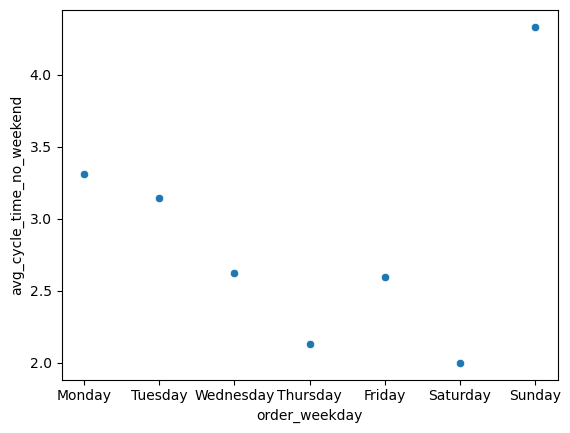

In [ ]:
sns.scatterplot(x = "order_weekday", 
               y = "avg_cycle_time_no_weekend", 
               data = order_cycle_time_by_weekday)

#### Scatter Plot for Order Cycle Time - Standard Processing

<Axes: xlabel='order_weekday', ylabel='order_to_ready_int_no_weekend'>

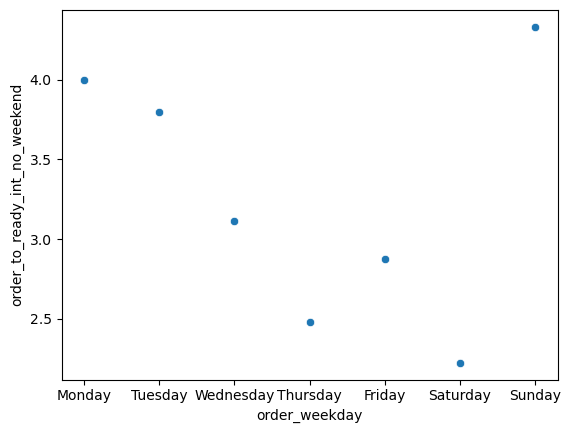

In [ ]:
sns.scatterplot(x = "order_weekday", 
               y = "order_to_ready_int_no_weekend", 
               data = order_cycle_time_standard_by_weekday)

#### **Observation**

We see a variablity in the weekdays. They seem to take longer in the beginning of the week. Technically this should be all the same.

#### Scatter Plot for Order Cycle Time - Express

<Axes: xlabel='order_weekday', ylabel='order_to_ready_int_no_weekend'>

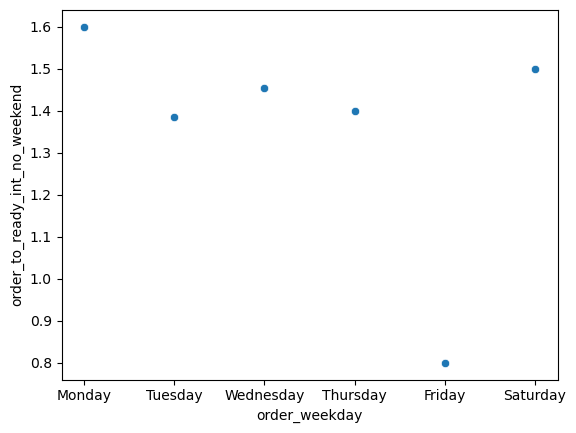

In [ ]:
sns.scatterplot(x = "order_weekday", 
               y = "order_to_ready_int_no_weekend", 
               data = order_cycle_time_express_by_weekday)

#### **Observation**
- For Express processing we see overall slightly less variability. 

- For fridays we see the shortest order cycle time on average. 

## Summary of observations for order cycle time - it's a wrap

- Technically we expect two days for every order to be processed but its not. 

- We learned the ship mode has a clear effect although this shouldn't be the case according to the warehouse managers description.

- We see a variability in the weekdays. Technically this should be all the same.

- Overall we have only 204 data points. In order to identify trends and be less affected by outliers, we need to collect more data.

#### Next steps

- Collect more data!

- Take these insights back to your team and brainstorm together. 

- Feedback loop with the warehouse manager.

- Brainstorm and discuss new ideas:
    - public holidays?
    - time of day the order was placed?


---
# Let's move to the next KPI....

![KPI overview](images/kpi.png)

## Investigation of delay in order pickup time

Let's recap, 
- how would the order cycle time look like in an ideal world? 

- What are the most relevant factors affecting the delivery process? 

- What are our assumptions we want to test?


Exercise: Draw a business process chart for order pick up time


The cell below contains a possible solution.
To compare your solution simply add a **`)`** at the end


![Order Pickup Time With Weekend](images/order_pickup_time_weekend.png)

#### **Observations**
- Same here, we see that the weekend has a big effect on the effective order cycle time from the customers perspective. For our root-cause analysis we'll take out the weekend here, as well. 

- In an ideal world the order pickup time should be 1 or 2 days for standard processing and 0 or 1 days for express. 

- The ship mode has an impact on the order pickup time.

- We see that truck availability has an impact on the order pickup time. We'll explore this with our data.

- We see that the day of order has an impact on the pickup order time. We'll explore this with our data.

#### Next steps
- Draw process without weekend

- Investigate impact of ship mode and confirm our assumption with data.

- Investigate relationship with weekday of 'ready to ship' and confirm our assumption with data.

- Investigate impact of truck availability and confirm our assumption with data.


The cell below contains a possible solution.
To compare your solution simply double click on the cell and add a **`)`** at the end


![Order Pickup Time No Weekend](images/order_pickup_time_no_weekend.png)

#### **Observations**
- In an ideal world the order pick time should be 1 or 2 days for standard processing and 0 or 1 days for express. 

- The ship mode is affecting the pickup order time.

- We see that truck availability has an impact one the order pickup time. We'll explore this with our data.

- The day of order is impacting the pickup time.


#### Next steps
- Investigate impact of ship mode and confirm our assumption with data.

- Investigate relationship with weekday of 'ready to ship' and confirm our assumption with data.

- Investigate impact of truck availability and confirm our assumption with data.


In [ ]:
# order pick up
# convert the "on_truck_scan_date" to datetime and save as on the same column 'on_truck_scan_date'
pickup_time['_______'] = pd.to_datetime(pickup_time["on_truck_scan_date"])

# doing the same for "ready_to_ship_date",using .to_datetime 
pickup_time['ready_to_ship_date'] = pd.______(pickup_time["________"])

# We are excluding the weekends using np.busday_count on every data entry for both columns.
# It takes only business days into account between the 2 dates i.e. number of days that are working
# days between "ready_to_ship_date" and "on_truck_scan_date"
pickup_time['pickup_time_delta_no_weekend'] = pickup_time.apply(lambda row: np.busday_count(
                                                                        row['ready_to_ship_date'].date(), 
                                                                        row['on_truck_scan_date'].date()),axis=1)


<details>

<summary>Spoiler</summary>

```python

# order pick up
# convert the "on_truck_scan_date" to datetime and save as on the same column 'on_truck_scan_date'
pickup_time['on_truck_scan_date'] = pd.to_datetime(pickup_time["on_truck_scan_date"])

# doing the same for "ready_to_ship_date",using to_datetime 
pickup_time['ready_to_ship_date'] = pd.to_datetime(pickup_time["ready_to_ship_date"])

# We are excluding the weekends using np.busday_count on every data entry for both columns.
# It takes only business days into account between the 2 dates i.e. number of days that are working
# days between "ready_to_ship_date" and "on_truck_scan_date"
pickup_time['pickup_time_delta_no_weekend'] = pickup_time.apply(lambda row: np.busday_count(
                                                                        row['ready_to_ship_date'].date(), 
                                                                        row['on_truck_scan_date'].date()),axis=1)

```
</details>

In [ ]:
# Calculating the .mean() for the columns we are interested in i.e. with and without weekends
pickup_time[['pickup_time_delta_no_weekend','pickup_time_delta']].mean()

/var/folders/6y/fp51t1kd1_343ds2msjm1xtr0000gn/T/ipykernel_63270/200831547.py:2: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  pickup_time[['pickup_time_delta_no_weekend','pickup_time_delta']].mean()


pickup_time_delta_no_weekend    1.357843
dtype: float64

In [ ]:
# Validating 
pickup_time['pickup_time_delta_no_weekend'].mean()

1.357843137254902

With only counting business days the average order pickup time is slightly less than the pickup time including the weekends.

`As this KPI is directly affected by the ship mode`. We should split our dataset in two groups and confirm if the average meets our assumptions.

---
## Step 1 - Order Pickup Time by Ship Mode

In [ ]:
# Retrieving the column names for the pickup_time

pickup_time.columns

Index(['order_id', 'ready_to_ship_date', 'pickup_date', 'order_date',
       'on_truck_scan_date', 'ship_mode', 'pickup_time_delta',
       'pickup_time_delta_int', 'order_weekday', 'on_truck_weekday',
       'ready_to_ship_weekday', 'order_weekday_int', 'ready_to_ship_int',
       'on_truck_int', 'pickup_time_delta_no_weekend'],
      dtype='object')

#### Let's get average order cycle time KPIs broken down by ship mode

In [ ]:
# this here is called a lambda function: 'lambda x: x.nunique()' it enables to cound unique order_ids
pickup_time_avg_by_ship_mode = pickup_time.groupby('ship_mode')\
                                .agg(order_count=('order_id',lambda x: x.nunique()),
                                    avg_order_cycle_time=('pickup_time_delta_no_weekend','mean'))

# let's take a look
pickup_time_avg_by_ship_mode


,order_count,avg_order_cycle_time
ship_mode,,
Express,53,0.396226
Standard Processing,151,1.695364


#### **Observation**
- The data-driven reality is longer for express shipping mode, it's 0.4 instead of 0 days. Investigate this further.

- The data-driven reality is between 1 and 2 for standard shipping mode, with 1.7 it's closer to 2 days. Investigate this further.

#### Next step 
- Study distributions of the average order pickup time for express and standard ship mode.

In [ ]:
# For that, create two subsets of our data - one for Express, one for standard
pickup_time_standard = pickup_time[pickup_time.ship_mode=='Standard Processing']
pickup_time_express = pickup_time[pickup_time.ship_mode=='Express']

#### Distribution for Order Pickup Time - Standard Processing

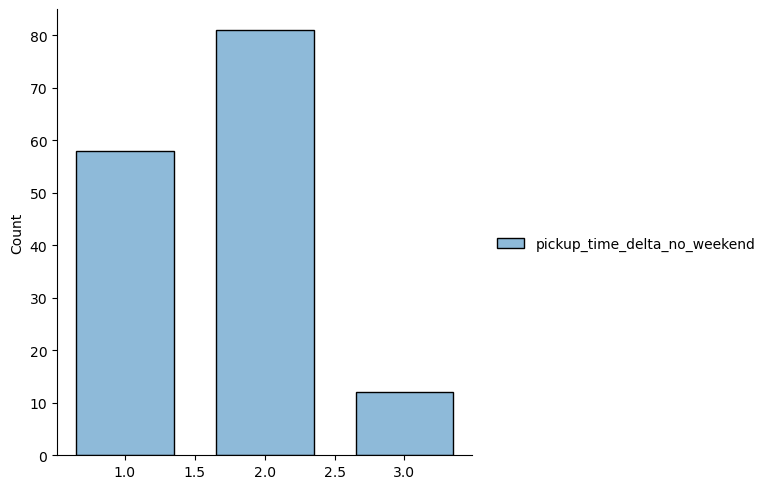

In [ ]:
# Use seaborn displot to check the distribution on the "order_id" and "pickup_time_delta_no_weekend"
___.____(pickup_time_standard[['order_id','_____']],discrete=True,shrink=.7)

<details>

<summary>Spoiler</summary>

```python
# Use displot to check the distribution on the "order_id" and "pickup_time_delta_no_weekend"
sns.displot(pickup_time_standard[['order_id','pickup_time_delta_no_weekend']],discrete=True,shrink=.7)

```
</details>

#### **Observations**
- Around 60% of standard orders need 2 or 3 days.

- The ideal scenario where an order should only take 1 to be picked up happens in only 40% of cases.

#### Distribution for Order Pickup Time - Express Processing

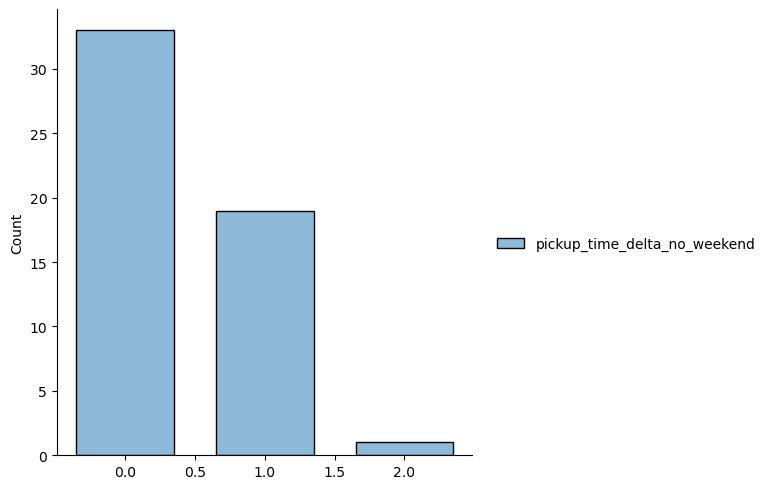

In [ ]:
# We do the same for the express processing now
sns.displot(________[['_____','_____']],discrete=True,shrink=.7)



<details>

<summary>Spoiler</summary>

```python

# We do the same for the express processing now
sns.displot(pickup_time_express[['order_id','pickup_time_delta_no_weekend']],discrete=True,shrink=.7)
```
</details>

#### **Observations**
- For express this looks better. the ideal scenario where an order should be picked up the same day happens in around 70% of cases.

- In our small sample size is only one express order that took 2 days to be picked.

- Around 30% of orders need 1 day for order pickup.

#### **Observation for combined view on standard versus express shipping mode**
- We can confirm our assumption that the ship mode really has an effect on the order pickup time as the two subsets of our data are differently distributed.

- The standard processing has order pickup time in 1 day only for 40% of cases. this might be due to the truck availability. we should investigate this further.

#### Next step
- Investigate relationship with weekday of order and confirm our assumption with data.

- Investigate impact of truck availability and confirm our assumption with data.

## Order Pickup time and weekday of order per ship mode

In [ ]:
# retrieving the columns for the dataframe pickup_time_standard
pickup_time_standard._____

Index(['order_id', 'ready_to_ship_date', 'pickup_date', 'order_date',
       'on_truck_scan_date', 'ship_mode', 'pickup_time_delta',
       'pickup_time_delta_int', 'order_weekday', 'on_truck_weekday',
       'ready_to_ship_weekday', 'order_weekday_int', 'ready_to_ship_int',
       'on_truck_int', 'pickup_time_delta_no_weekend'],
      dtype='object')

<details>

<summary>Spoiler</summary>

```python

# retrieving the columns for the dataframe pickup_time_standard
pickup_time_standard.columns

```
</details>

### Standard Processing

In [ ]:
# this here is called a lambda function: 'lambda x: x.nunique()' it enables to cound unique order_ids
pickup_time_standard_by_weekday = pickup_time_standard.groupby(["ready_to_ship_weekday","ready_to_ship_int"]).agg(
                                        order_count=('order_id',lambda x: x.nunique()),
                                        avg_pickup_time_no_weekend=('pickup_time_delta_no_weekend','mean')
                                        )
pickup_time_standard_by_weekday.sort_values('ready_to_ship_int', inplace=True)

<Axes: xlabel='ready_to_ship_weekday', ylabel='avg_pickup_time_no_weekend'>

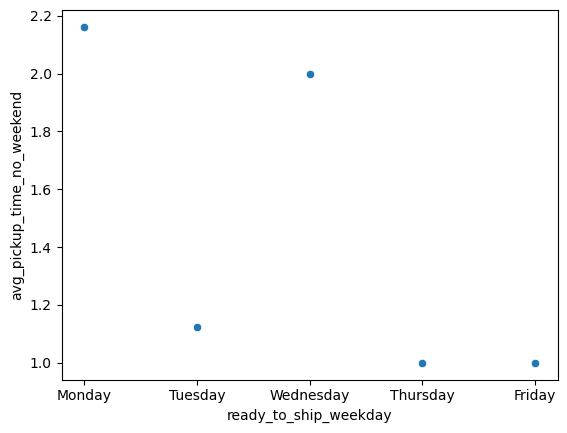

In [ ]:
# Plotting a sns.scatterplot with "ready_to_ship_weekday" on the x-axis and "avg_pickup_time_no_weekend"
# on the y-axis
____(x = "_____", 
               ___ = "avg_pickup_time_no_weekend", 
               data = pickup_time_standard_by_weekday)

<details>

<summary>Spoiler</summary>

```python

# Plotting a scatterplot with "ready_to_ship_weekday" on the x-axis and "avg_pickup_time_no_weekend"
# on the y-axis
sns.scatterplot(x = "ready_to_ship_weekday", 
               y = "avg_pickup_time_no_weekend", 
               data = pickup_time_standard_by_weekday)

```
</details>

In [ ]:
# Displaying the table by weekday
pickup_time_standard_by_weekday

,,order_count,avg_pickup_time_no_weekend
ready_to_ship_weekday,ready_to_ship_int,,
Monday,1,74,2.162162
Tuesday,2,24,1.125000
Wednesday,3,16,2.000000
Thursday,4,15,1.000000
Friday,5,22,1.000000


In [ ]:
# let's compare this to what the manager told us about the delivery times for standard and express
# we do this by adding a new column with the warehouse assumptions for the order cycle time.
pickup_time_standard_by_weekday['warehouse_assumption'] = ['2','1','2','1','1']

In [ ]:
# Adding the warehouse assumption

pickup_time_standard_by_weekday

,,order_count,avg_pickup_time_no_weekend,warehouse_assumption
ready_to_ship_weekday,ready_to_ship_int,,,
Monday,1,74,2.162162,2
Tuesday,2,24,1.125000,1
Wednesday,3,16,2.000000,2
Thursday,4,15,1.000000,1
Friday,5,22,1.000000,1


#### **Observations**

- We see in our small sample most orders are made readty to be picked up on monday (50%)

- We see orders that are ready to ship on monday and wednesday take on average 2 days

- Orders ready to ship on thursday or friday take only 1 day to be ready for pickup.

- Average pickup times for standard processing on mostly in line with the warehouse assumptions.

### Express Processing

In [ ]:
# this here is called a lambda function: 'lambda x: x.nunique()' it enables to cound unique order_ids
pickup_time_express_by_weekday = pickup_time_express.groupby(["ready_to_ship_weekday","ready_to_ship_int"]).agg(
                                        order_count=('order_id',lambda x: x.nunique()),
                                        avg_pickup_time_no_weekend=('pickup_time_delta_no_weekend','mean')
                                        )
pickup_time_express_by_weekday.sort_values('ready_to_ship_int', inplace=True)

<Axes: xlabel='ready_to_ship_weekday', ylabel='avg_pickup_time_no_weekend'>

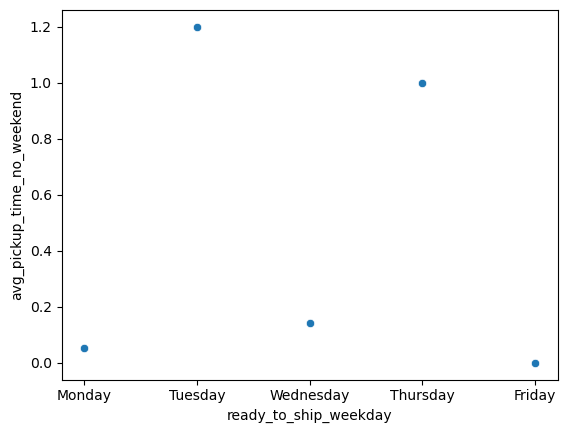

In [ ]:
# try plotting the same scatterplot for Express Processing that we did for Standard Processing 
# data = pickup_time_express_by_weekday

______.______(x = "_________", 
               y = "___________", 
               data = _________)

<details>

<summary>Answer</summary>

```python

# try plotting the same scatterplot that we did for Standard Processing 
sns.scatterplot(x = "ready_to_ship_weekday", 
               y = "avg_pickup_time_no_weekend", 
               data = pickup_time_express_by_weekday)
               
```
</details>

In [ ]:
pickup_time_express_by_weekday

,,order_count,avg_pickup_time_no_weekend
ready_to_ship_weekday,ready_to_ship_int,,
Monday,1,19,0.052632
Tuesday,2,5,1.200000
Wednesday,3,7,0.142857
Thursday,4,13,1.000000
Friday,5,9,0.000000


In [ ]:
# let's compare this to what the manager told us about the delivery times for standard and express
# we do this by adding a new column with the warehouse assumptions for the order cycle time.
pickup_time_express_by_weekday['warehouse_assumption'] = ['0','1','0','1','0']

In [ ]:
pickup_time_express_by_weekday

,,order_count,avg_pickup_time_no_weekend,warehouse_assumption
ready_to_ship_weekday,ready_to_ship_int,,,
Monday,1,19,0.052632,0
Tuesday,2,5,1.200000,1
Wednesday,3,7,0.142857,0
Thursday,4,13,1.000000,1
Friday,5,9,0.000000,0


#### **Observations**

- We see in our small sample most orders are made ready to be picked up on monday and thursday (65%)

- We see orders that are ready to ship on tuesday and thursday take on average 1 day with one outlier that takes 2 days.

- Orders ready to ship on monday, wednesday and friday are to be ready for pickup the same day.

- Average pickup times for express processing are pretty much in line with the warehouse assumptions. 

- We see the impact of truck availability is as expected.

### Summary of observations for order pickup time - it's a wrap

- Impact of truck availability and weekday of ready to ship is in line with our assumption.

- Monday seems to be a bottleneck: for standard processing the fact that half of all order were ready to ship on monday has a negative effect on the total average order pickup time. 

- Overall we have only 204 data points. In order to identify trends and be less affected by outliers, we need to collect more data.

#### Next steps
- Collect more data!

- Take these insights back to your team and brainstorm together. 

- Feedback loop with the warehouse manager.

- Brainstorm and discuss new ideas:
    - public holidays?
    - time of day the order was placed?
